#Importing the Necessary Libraries

In [ ]:
!pip install bayesian-optimization

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential, Model, load_model
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#Loading the Dataset

In [ ]:
df = pd.read_csv('/content/credit_card_churn.csv')

#Checking DataFrame Dimensions

In [ ]:
df.shape

(10127, 23)

#DataFrame Overview, Statistical Summary, and Missing Value Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [ ]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

#Removing Columns from DataFrame for Data Cleaning

In [ ]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'], axis=1, inplace=True)

In [ ]:
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [ ]:
df.tail(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


#Exploratory Data Analysis (EDA) Visualizations for Credit Card Churn Dataset

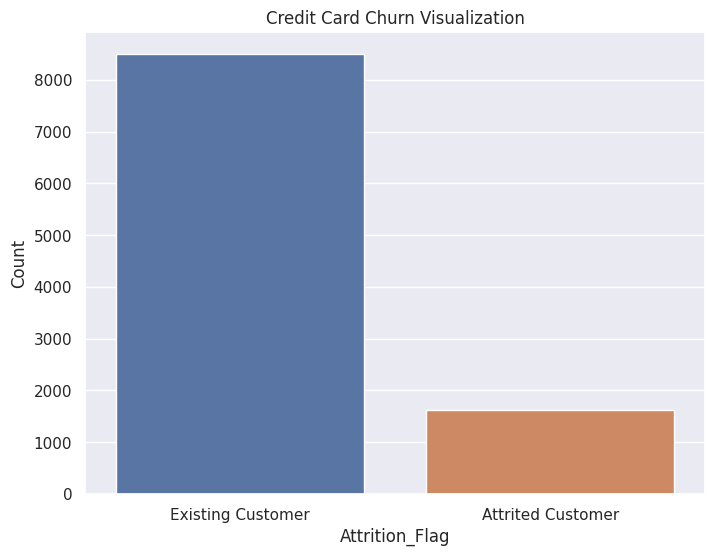

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(
    x='Attrition_Flag',
    data=df
)
plt.ylabel('Count')
plt.title('Credit Card Churn Visualization')
plt.show()

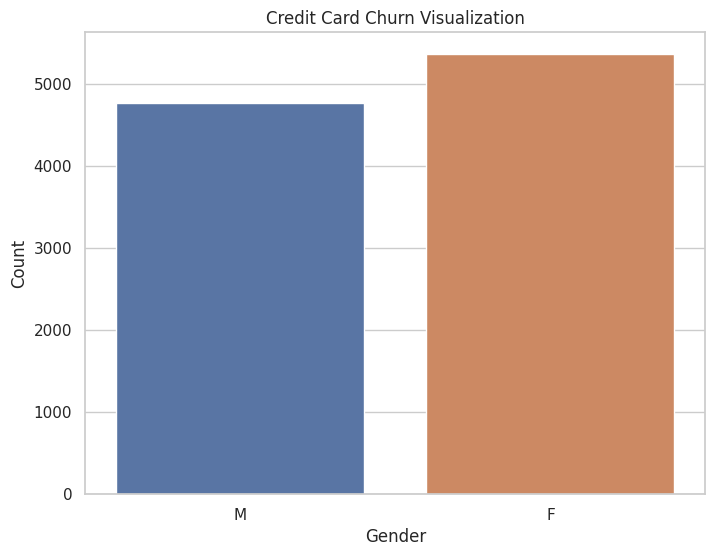

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(
    x='Gender',
    data=df
)
plt.ylabel('Count')
plt.title('Credit Card Churn Visualization')
plt.show()

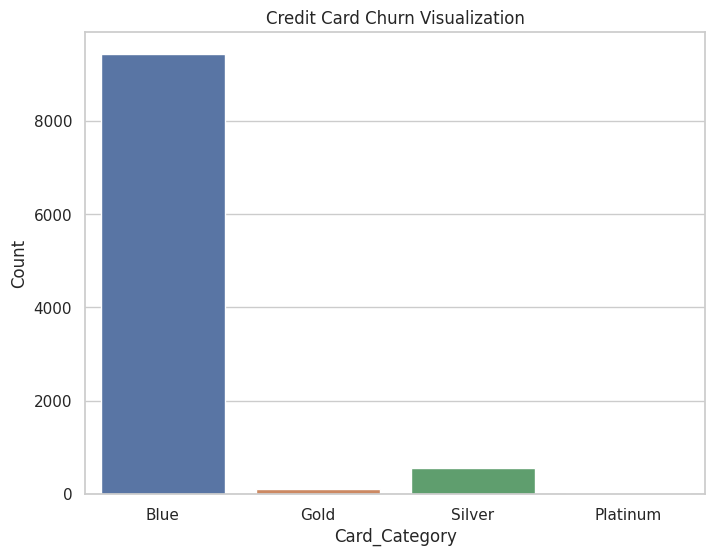

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(
    x='Card_Category',
    data=df
)
plt.ylabel('Count')
plt.title('Credit Card Churn Visualization')
plt.show()

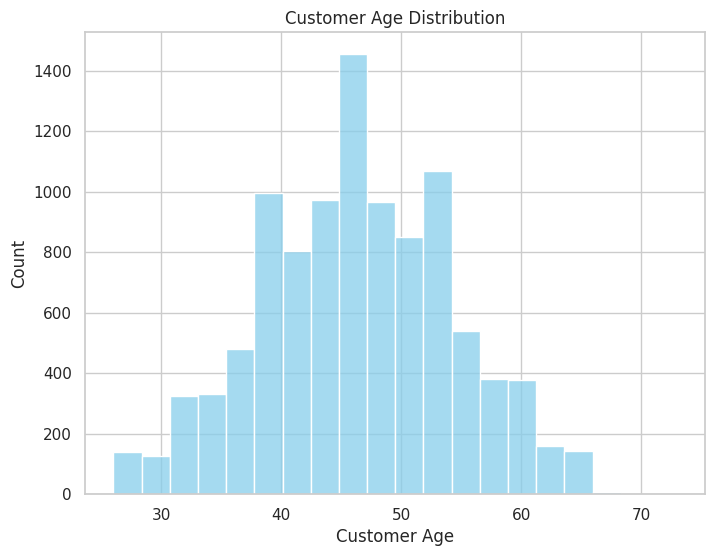

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(
    data=df,
    x='Customer_Age',
    bins=20, kde=False,
    color='skyblue'
)
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.title('Customer Age Distribution')
plt.show()

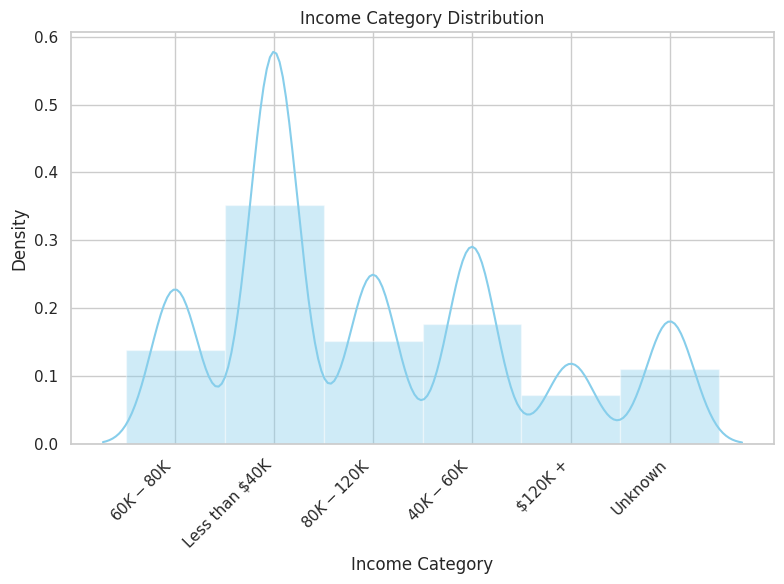

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(
    data=df,
    x='Income_Category',
    edgecolor=(1, 1, 1, .4),
    discrete=True,alpha=.4,
    kde=True,stat="density",
    kde_kws=dict(cut=3),
    color='skyblue'
)
plt.xlabel('Income Category')
plt.title('Income Category Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

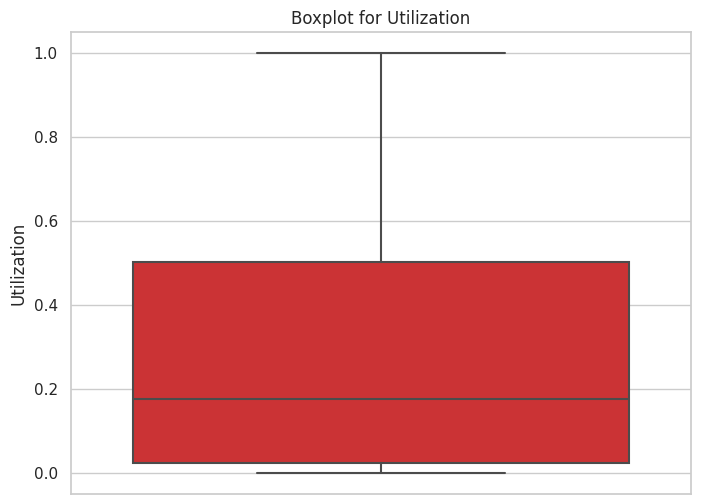

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(
    y='Avg_Utilization_Ratio',
    data=df, orient='v',
    palette='Set1'
)
p = plt.title('Boxplot for Utilization')
p = plt.ylabel('Utilization')

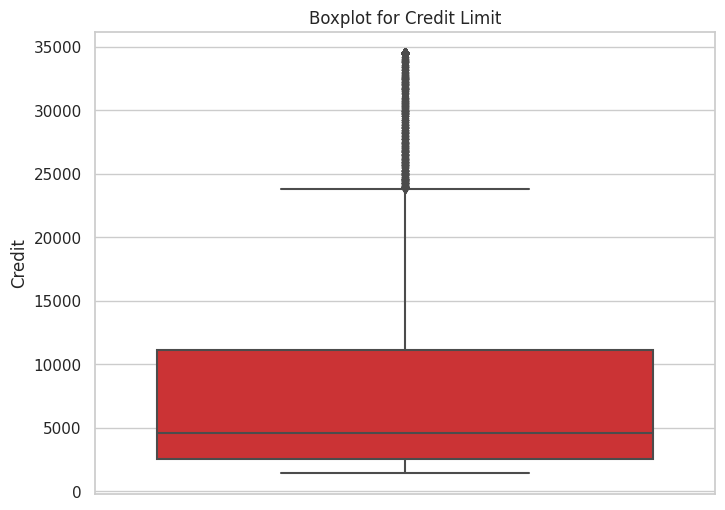

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(
    y='Credit_Limit',
    data=df, orient='v',
    palette='Set1'
)
p = plt.title('Boxplot for Credit Limit')
p = plt.ylabel('Credit')

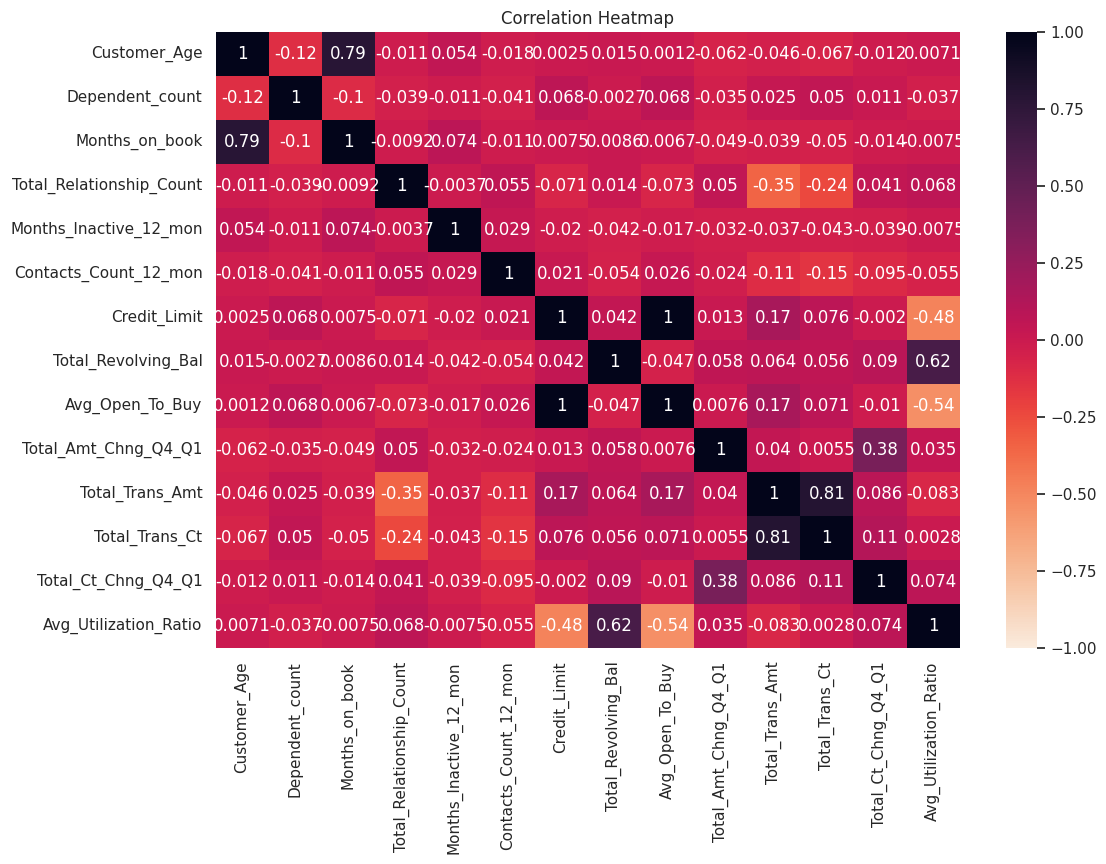

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    df.corr(numeric_only=True),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="rocket_r",
    ax=ax
)
plt.title('Correlation Heatmap')
plt.show()

#Feature Engineering: Creating Dummy Variables and Updating DataFrame Columns

In [ ]:
education_level = pd.get_dummies(df['Education_Level'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)
marital_status = pd.get_dummies(df['Marital_Status'], drop_first=True)
income_category = pd.get_dummies(df['Income_Category'], drop_first=True)
card_category = pd.get_dummies(df['Card_Category'], drop_first=True)

In [ ]:
df = pd.concat([df, education_level, gender, marital_status, income_category, card_category], axis=1)
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated',
       'Unknown', 'M', 'Married', 'Single', 'Unknown', '$40K - $60K',
       '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown', 'Gold',
       'Platinum', 'Silver'],
      dtype='object')

In [ ]:
df.drop(['Education_Level', 'Gender', 'Marital_Status', 'Income_Category', 'Card_Category'], axis=1, inplace=True)

In [ ]:
df.head(5)

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Single,Unknown,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,Gold,Platinum,Silver
0,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,1,0,0,0,0,0,0
1,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,1,0,0,0,0
2,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,1,0,0,0,0,0
3,Existing Customer,40,4,34,3,4,1,3313.0,2517,796.0,...,0,1,0,0,0,1,0,0,0,0
4,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,1,0,0,0,0,0,0


#Preprocessing and Feature Scaling for Modeling

In [ ]:
df2= df['Attrition_Flag']
df.drop("Attrition_Flag", axis= 1, inplace= True)
cols = df.columns

In [ ]:
sc = StandardScaler()
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns=cols)

In [ ]:
label_encoder = LabelEncoder()
df2 = label_encoder.fit_transform(df2)

In [ ]:
df.head(5)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Single,Unknown,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,Gold,Platinum,Silver
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,...,-0.798507,-0.282609,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,-0.107644,-0.044484,-0.240794
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,...,1.252337,-0.282609,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,-0.107644,-0.044484,-0.240794
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,...,-0.798507,-0.282609,-0.463363,-0.400859,2.365881,-0.736437,-0.351212,-0.107644,-0.044484,-0.240794
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,...,-0.798507,3.538459,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,-0.107644,-0.044484,-0.240794
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,...,-0.798507,-0.282609,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,-0.107644,-0.044484,-0.240794


In [ ]:
df2

array([1, 1, 1, ..., 0, 0, 0])

#Splitting Data into Training and Testing Sets

In [ ]:
X = df
Y = df2

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(8101, 32) (2026, 32)


#Machine Learning Models

##Hyperparameter Tuning and Evaluation of Logistic Regression Model

In [ ]:
lr = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [ 200, 300, 500],
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_lr_model = grid_search.best_estimator_
y_pred = best_lr_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred) * 100
classification_rep = classification_report(Y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'C': 0.1, 'max_iter': 200}
Accuracy : 89.63%
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.52      0.62       327
           1       0.91      0.97      0.94      1699

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.78      2026
weighted avg       0.89      0.90      0.89      2026



Text(91.25, 0.5, 'Actual values')

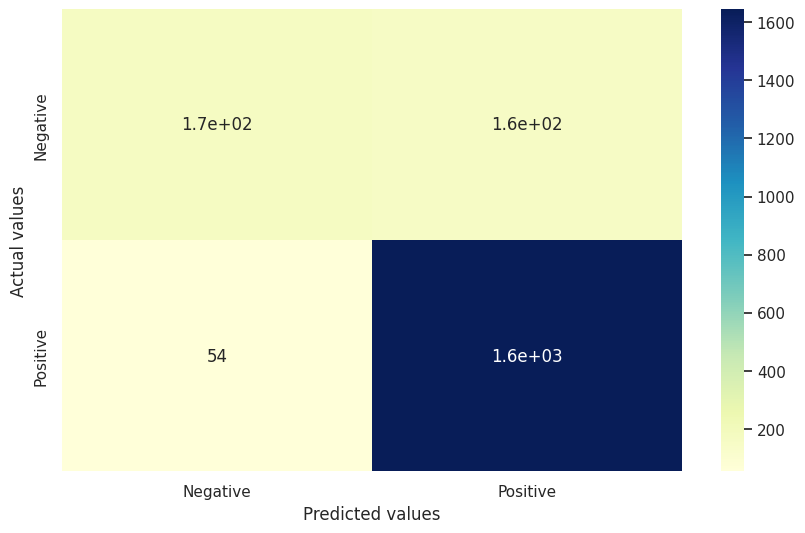

In [ ]:
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Hyperparameter Tuning and Evaluation of Support Vector Classifier(SVC) Model

In [ ]:
svc = SVC(probability=True, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_svc_model = grid_search.best_estimator_
y_pred2 = best_svc_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred2) * 100
classification_rep = classification_report(Y_test, y_pred2)

print(f"Accuracy with Best Hyperparameters: {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy with Best Hyperparameters: 91.66%
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       327
           1       0.94      0.96      0.95      1699

    accuracy                           0.92      2026
   macro avg       0.86      0.82      0.84      2026
weighted avg       0.91      0.92      0.91      2026



Text(91.25, 0.5, 'Actual values')

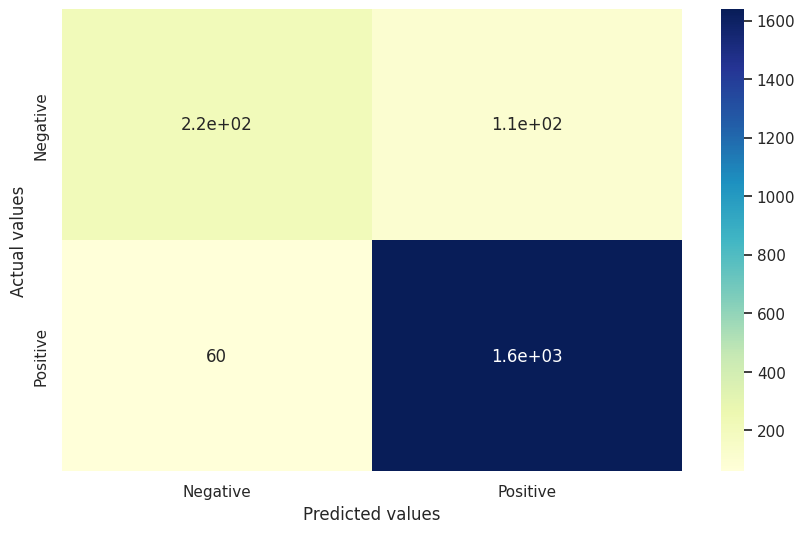

In [ ]:
cm = confusion_matrix(Y_test, y_pred2)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Hyperparameter Tuning and Evaluation of Random Forest Classifier Model

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15, 20],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, Y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_rf_model = grid_search.best_estimator_
y_pred3 = best_rf_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred3) * 100
classification_rep = classification_report(Y_test, y_pred3)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'max_depth': 15, 'n_estimators': 300}
Accuracy : 94.62%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       327
           1       0.95      0.98      0.97      1699

    accuracy                           0.95      2026
   macro avg       0.93      0.87      0.89      2026
weighted avg       0.94      0.95      0.94      2026



Text(91.25, 0.5, 'Actual values')

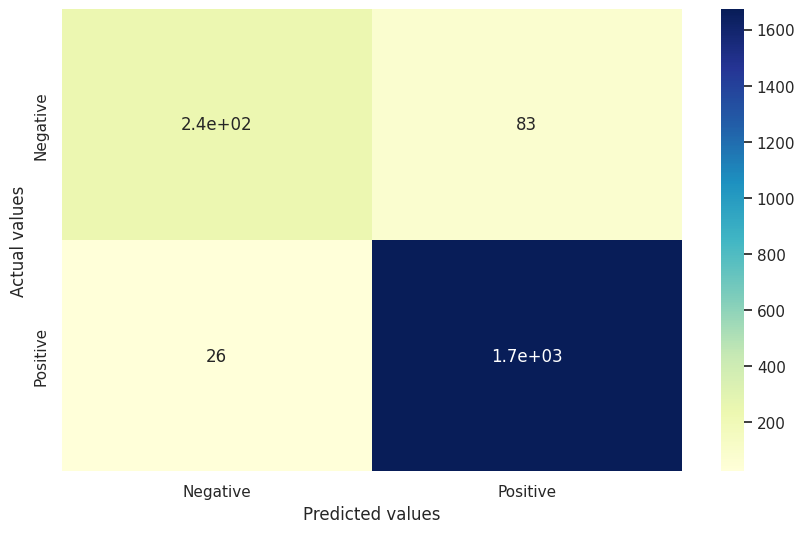

In [ ]:
cm = confusion_matrix(Y_test, y_pred3)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

## Hyperparameter Tuning and Evaluation of Gradient Boosting Classifier Model

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': [1, 'sqrt', 'log2'],
    'max_depth': [3, 5, 7, 9, 15],
}

grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_gbc_model = grid_search.best_estimator_
y_pred4 = best_gbc_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred4) * 100
classification_rep = classification_report(Y_test, y_pred4)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
Accuracy : 96.69%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       327
           1       0.98      0.98      0.98      1699

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



Text(91.25, 0.5, 'Actual values')

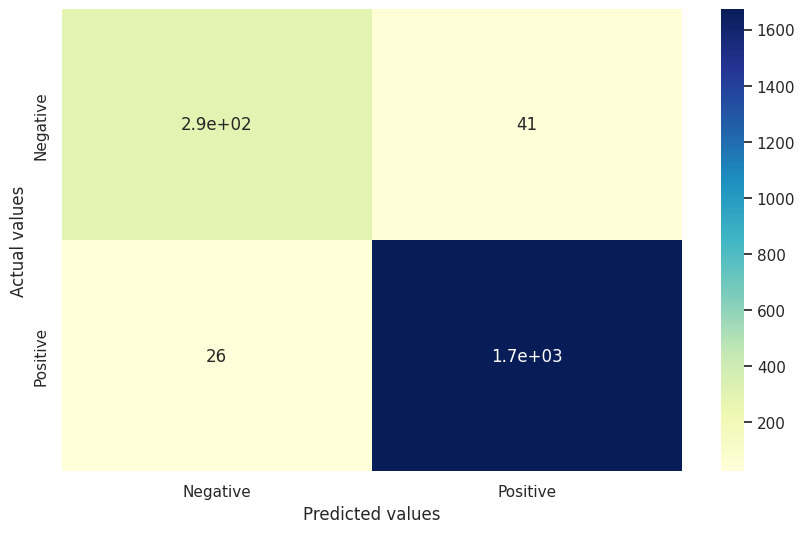

In [ ]:
cm = confusion_matrix(Y_test, y_pred4)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Hyperparameter Tuning and Evaluation of Voting Classifier Model

In [ ]:
rfc = RandomForestClassifier(random_state=42)
param_grid_rfc = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3,10, 15, 20]
}
grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rfc.fit(X_train, Y_train)

lr = LogisticRegression(max_iter=1000, n_jobs=-1)
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [100, 200, 300, 500],
}
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, Y_train)

svc = SVC(probability=True)
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svc.fit(X_train, Y_train)

gbc = GradientBoostingClassifier(random_state=42)
param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 15]
}
grid_search_gbc = GridSearchCV(gbc, param_grid_gbc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gbc.fit(X_train, Y_train)

knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 15],
    'weights': ['uniform', 'distance']
}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, Y_train)

best_rfc = grid_search_rfc.best_estimator_
best_lr = grid_search_lr.best_estimator_
best_svc = grid_search_svc.best_estimator_
best_gbc = grid_search_gbc.best_estimator_
best_knn = grid_search_knn.best_estimator_

ec = VotingClassifier(estimators=[
    ('Random Forest', best_rfc),
    ('Logistic Regression', best_lr),
    ('Support Vector Machine', best_svc),
    ('Gradient Boosting', best_gbc),
    ('K-Nearest Neighbors', best_knn)
], voting='soft')

ec.fit(X_train, Y_train)

y_pred5 = ec.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred5) * 100
classification_rep = classification_report(Y_test, y_pred5)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report: ")
print(classification_rep)

Accuracy : 94.23%
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.70      0.80       327
           1       0.95      0.99      0.97      1699

    accuracy                           0.94      2026
   macro avg       0.93      0.85      0.88      2026
weighted avg       0.94      0.94      0.94      2026



Text(91.25, 0.5, 'Actual values')

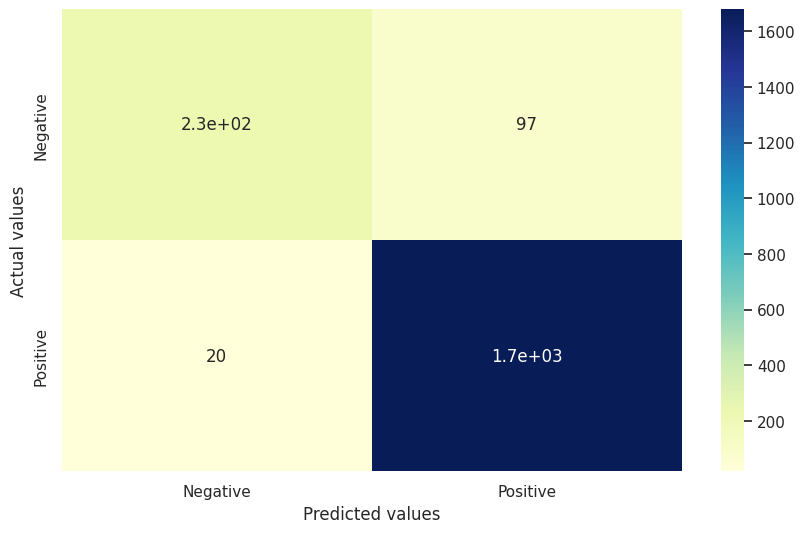

In [ ]:
cm = confusion_matrix(Y_test, y_pred5)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Hyperparameter Tuning and Evaluation of AdaBoost Classifier Model

In [ ]:
rfc = RandomForestClassifier(random_state=42)

abc = AdaBoostClassifier(estimator=rfc, random_state=42)

param_grid = {
    'estimator__n_estimators': [100, 200],
    'estimator__max_depth': [5, 7, 10],
    'learning_rate': [0.1, 0.5],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(abc, param_grid, cv=2, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_abc_model = grid_search.best_estimator_
y_pred6 = best_abc_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred6) * 100
classification_rep = classification_report(Y_test, y_pred6)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'estimator__max_depth': 5, 'estimator__n_estimators': 100, 'learning_rate': 0.5, 'n_estimators': 200}
Accuracy: 96.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       327
           1       0.98      0.98      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026



Text(91.25, 0.5, 'Actual values')

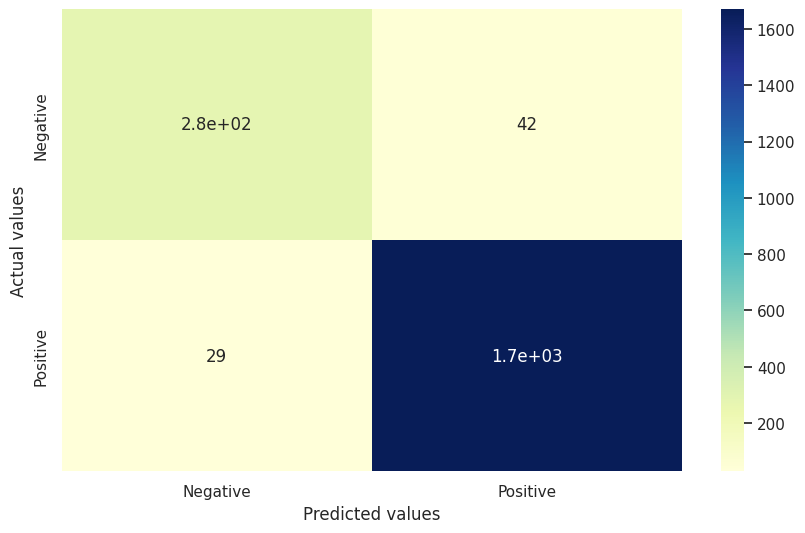

In [ ]:
cm = confusion_matrix(Y_test, y_pred6)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

#Deep Learnng Model

##Bayesian Hyperparameter Optimization for Deep Neural Network (DNN)

In [ ]:
def create_model(neurons1, neurons2, neurons3, neurons4, neurons5,neurons6, dropout_rate):
    model = Sequential()
    model.add(Dense(int(neurons1), input_shape=(32,), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(int(neurons2), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(int(neurons3), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(int(neurons4), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(int(neurons5), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(int(neurons6), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr==0.001), metrics=['accuracy'])
    return model

def objective_function(neurons1, neurons2, neurons3, neurons4, neurons5,neurons6, dropout_rate):
    model = create_model(neurons1, neurons2, neurons3, neurons4, neurons5,neurons6, dropout_rate)
    history = model.fit(X_train, Y_train, epochs=10, batch_size=16, validation_split=0.1, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    return val_acc

pbounds = {'neurons1': (64, 256),
           'neurons2': (16, 128),
           'neurons3': (64, 256),
           'neurons4': (128, 512),
           'neurons5': (256, 1024),
           'neurons6': (512,1024),
           'dropout_rate': (0.1, 0.3)}

optimizer = BayesianOptimization(f=objective_function, pbounds=pbounds, verbose=2, random_state=42)

optimizer.maximize(init_points=7, n_iter=30)

best_params = optimizer.max['params']
best_neuron1 = int(best_params['neurons1'])
best_neuron2 = int(best_params['neurons2'])
best_neuron3 = int(best_params['neurons3'])
best_neuron4 = int(best_params['neurons4'])
best_neuron5 = int(best_params['neurons5'])
best_neuron6 = int(best_params['neurons6'])
best_dropout_rate = best_params['dropout_rate']

print("Best Hyperparameters:")
print(f"Neurons1: {best_neuron1}")
print(f"Neurons2: {best_neuron2}")
print(f"Neurons3: {best_neuron3}")
print(f"Neurons4: {best_neuron4}")
print(f"Neurons5: {best_neuron5}")
print(f"Neurons6: {best_neuron6}")
print(f"Dropout Rate: {best_dropout_rate}")

|   iter    |  target   | dropou... | neurons1  | neurons2  | neurons3  | neurons4  | neurons5  | neurons6  |
-------------------------------------------------------------------------------------------------------------
| 1         | 0.1813    | 0.1749    | 246.5     | 97.98     | 178.9     | 187.9     | 375.8     | 541.7     |
| 2         | 0.4982    | 0.2732    | 179.4     | 95.3      | 67.95     | 500.4     | 895.3     | 620.7     |
| 3         | 0.1887    | 0.1364    | 99.21     | 50.08     | 164.8     | 293.9     | 479.7     | 825.3     |
| 4         | 0.836     | 0.1279    | 120.1     | 57.03     | 151.6     | 429.5     | 409.3     | 775.3     |
| 5         | 0.6991    | 0.2185    | 72.92     | 84.05     | 96.74     | 153.0     | 984.7     | 1.006e+03 |
| 6         | 0.8348    | 0.2617    | 122.5     | 26.94     | 195.4     | 297.0     | 349.7     | 765.5     |
| 7         | 0.7805    | 0.1069    | 238.6     | 44.98     | 191.2     | 247.7     | 655.4     | 791.9     |
| 8       

###Deep Neural Network (DNN) Training and Evaluation with Dropout Regularization

In [ ]:
model = Sequential()

model.add(Dense(215, input_shape=(32,), activation='relu'))
model.add(Dropout(0.287))

model.add(Dense(44, activation='relu'))
model.add(Dropout(0.287))

model.add(Dense(197, activation='relu'))
model.add(Dropout(0.287))

model.add(Dense(212, activation='relu'))
model.add(Dropout(0.287))

model.add(Dense(754, activation='relu'))
model.add(Dropout(0.287))

model.add(Dense(889, activation='relu'))
model.add(Dropout(0.287))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(X_train, Y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=2, callbacks=[checkpoint])

best_model = load_model('best_model.h5')

score = best_model.evaluate(X_test, Y_test, verbose=0)

print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_142"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_961 (Dense)           (None, 215)               7095      
                                                                 
 dropout_819 (Dropout)       (None, 215)               0         
                                                                 
 dense_962 (Dense)           (None, 44)                9504      
                                                                 
 dropout_820 (Dropout)       (None, 44)                0         
                                                                 
 dense_963 (Dense)           (None, 197)               8865      
                                                                 
 dropout_821 (Dropout)       (None, 197)               0         
                                                                 
 dense_964 (Dense)           (None, 212)            

In [ ]:
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

64/64 [==============================] - 0s 5ms/step


In [ ]:
classification_rep = classification_report(Y_test, y_pred)

print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.78       327
           1       0.95      0.97      0.96      1699

    accuracy                           0.93      2026
   macro avg       0.89      0.85      0.87      2026
weighted avg       0.93      0.93      0.93      2026



Text(91.25, 0.5, 'Actual values')

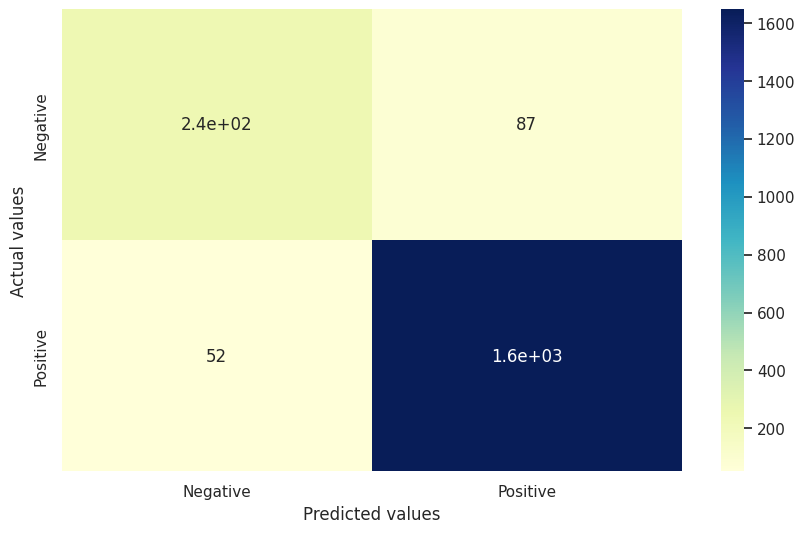

In [ ]:
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

###Model Training and Validation Visualization for Accuracy and Loss

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

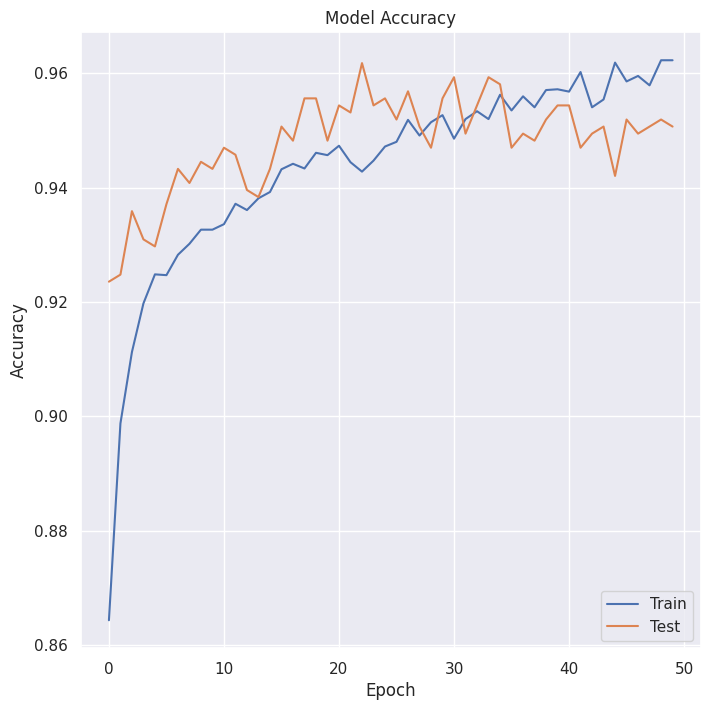

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

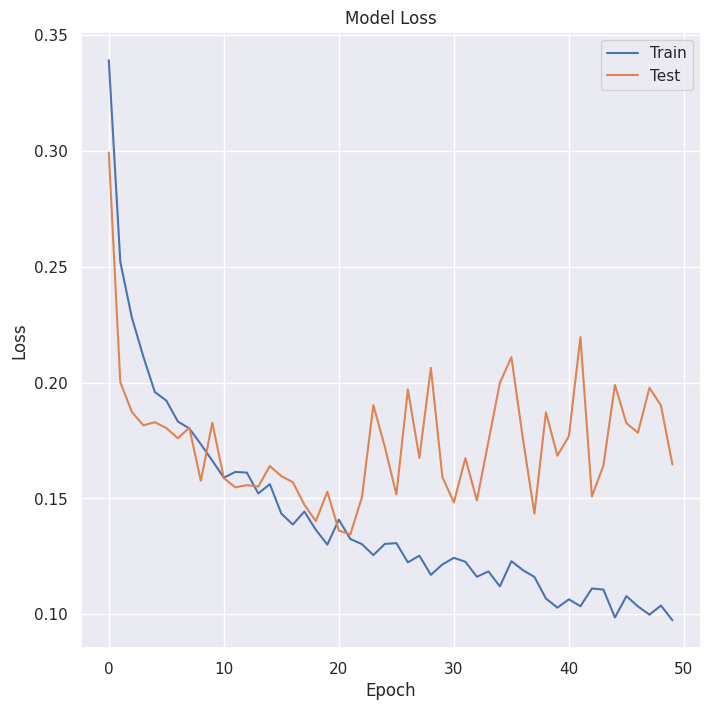

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

##Bayesian Hyperparameter Optimization for 1D Convolutional Neural Network (CNN)

In [ ]:
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

def create_cnn_model(filters1, kernel_size1, filters2, kernel_size2, dense_units1, dropout_rate):
    model = Sequential()

    model.add(Conv1D(int(filters1), int(kernel_size1), activation='relu', input_shape=(32, 1)))
    model.add(MaxPooling1D(2))
    model.add(Dropout(dropout_rate))

    model.add(Conv1D(int(filters2), int(kernel_size2), activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(int(dense_units1), activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr==0.001), metrics=['accuracy'])
    return model

def objective_function(filters1, kernel_size1, filters2, kernel_size2, dense_units1, dropout_rate):
    model = create_cnn_model(filters1, kernel_size1, filters2, kernel_size2, dense_units1, dropout_rate)
    history = model.fit(X_train_cnn, Y_train, epochs=10, batch_size=16, validation_split=0.1, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    return val_acc

pbounds = {'filters1': (32, 128),
           'kernel_size1': (2, 5),
           'filters2': (64, 256),
           'kernel_size2': (2, 5),
           'dense_units1': (64, 256),
           'dropout_rate': (0.1, 0.4)}

optimizer = BayesianOptimization(f=objective_function, pbounds=pbounds, verbose=2, random_state=42)

optimizer.maximize(init_points=6, n_iter=30)

best_params = optimizer.max['params']
best_filters1 = int(best_params['filters1'])
best_kernel_size1 = int(best_params['kernel_size1'])
best_filters2 = int(best_params['filters2'])
best_kernel_size2 = int(best_params['kernel_size2'])
best_dense_units1 = int(best_params['dense_units1'])
best_dropout_rate = best_params['dropout_rate']

print('best_filters1: ', best_filters1)
print('best_kernel_size1: ', best_kernel_size1)
print('best_filters2: ', best_filters2)
print('best_kernel_size2: ', best_kernel_size2)
print('best_dense_units1: ', best_dense_units1)
print('best_dropout_rate: ', best_dropout_rate)

|   iter    |  target   | dense_... | dropou... | filters1  | filters2  | kernel... | kernel... |
-------------------------------------------------------------------------------------------------
| 1         | 0.3391    | 135.9     | 0.3852    | 102.3     | 178.9     | 2.468     | 2.468     |
| 2         | 0.164     | 75.15     | 0.3599    | 89.71     | 199.9     | 2.062     | 4.91      |
| 3         | 0.3329    | 223.8     | 0.1637    | 49.46     | 99.21     | 2.913     | 3.574     |
| 4         | 0.4538    | 146.9     | 0.1874    | 90.74     | 90.78     | 2.876     | 3.099     |
| 5         | 0.5401    | 151.6     | 0.3356    | 51.17     | 162.7     | 3.777     | 2.139     |
| 6         | 0.7115    | 180.6     | 0.1512    | 38.24     | 246.2     | 4.897     | 4.425     |
| 7         | 0.1652    | 180.5     | 0.3019    | 39.79     | 246.7     | 4.515     | 4.415     |
| 8         | 0.164     | 87.85     | 0.3138    | 103.1     | 94.03     | 3.901     | 4.655     |
| 9         | 0.1874

###1D Convolutional Neural Network (CNN) Training and Evaluation with Dropout Regularization

In [ ]:
model = Sequential()

model.add(Conv1D(103, 2, activation='relu', input_shape=(32, 1)))
model.add(MaxPooling1D(2))
model.add(Dropout(0.27))

model.add(Conv1D(239, 4, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.27))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.27))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.27))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.27))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

checkpoint = ModelCheckpoint('best_model_cnn.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

model_history = model.fit(X_train_cnn, Y_train,verbose=2, epochs=50, batch_size=16, validation_split=0.1, callbacks=[checkpoint])

best_model = load_model('best_model_cnn.h5')

score = best_model.evaluate(X_test_cnn, Y_test, verbose=0)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_182"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_78 (Conv1D)          (None, 31, 103)           309       
                                                                 
 max_pooling1d_78 (MaxPoolin  (None, 15, 103)          0         
 g1D)                                                            
                                                                 
 dropout_1020 (Dropout)      (None, 15, 103)           0         
                                                                 
 conv1d_79 (Conv1D)          (None, 12, 239)           98707     
                                                                 
 max_pooling1d_79 (MaxPoolin  (None, 6, 239)           0         
 g1D)                                                            
                                                                 
 dropout_1021 (Dropout)      (None, 6, 239)         

In [ ]:
y_pred= best_model.predict(X_test_cnn)
y_pred = (y_pred > 0.5).astype(int)

64/64 [==============================] - 0s 3ms/step


In [ ]:
classification_rep = classification_report(Y_test, y_pred)

print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80       327
           1       0.96      0.97      0.96      1699

    accuracy                           0.94      2026
   macro avg       0.90      0.87      0.88      2026
weighted avg       0.94      0.94      0.94      2026



Text(91.25, 0.5, 'Actual values')

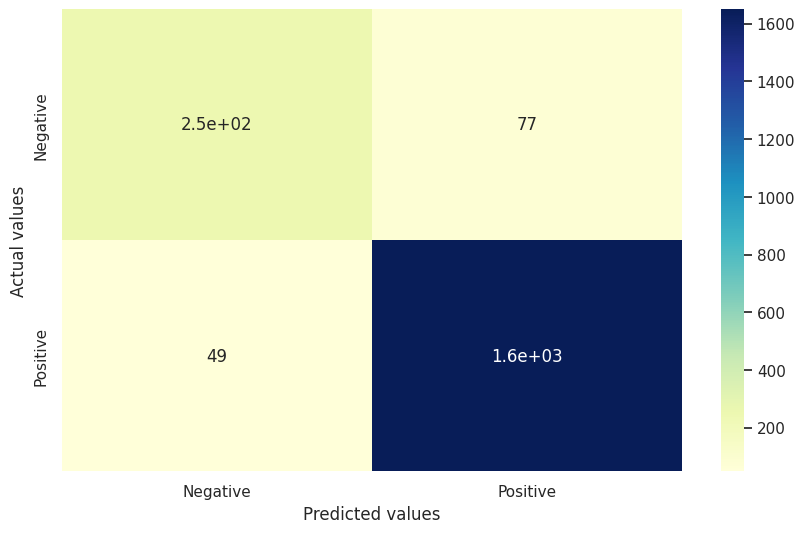

In [ ]:
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

###Model Training and Validation Visualization for Accuracy and Loss

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

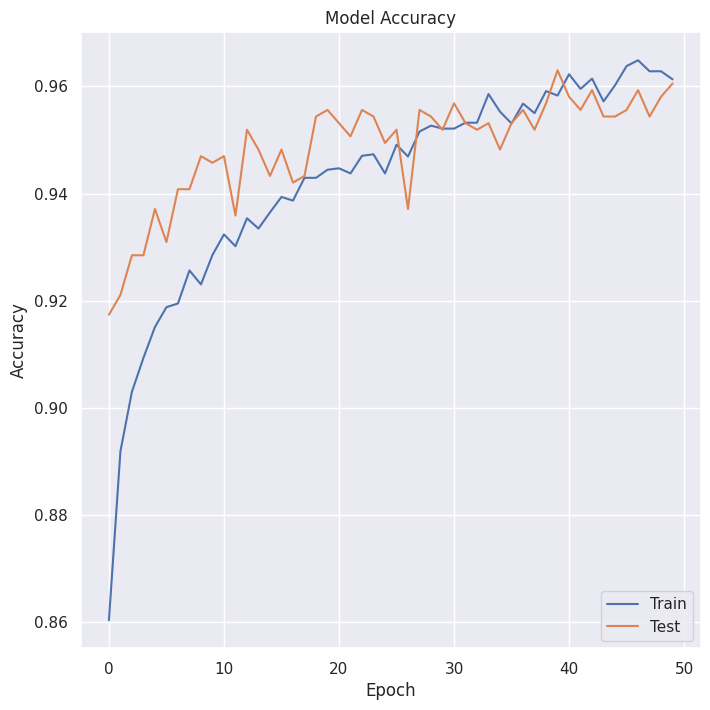

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

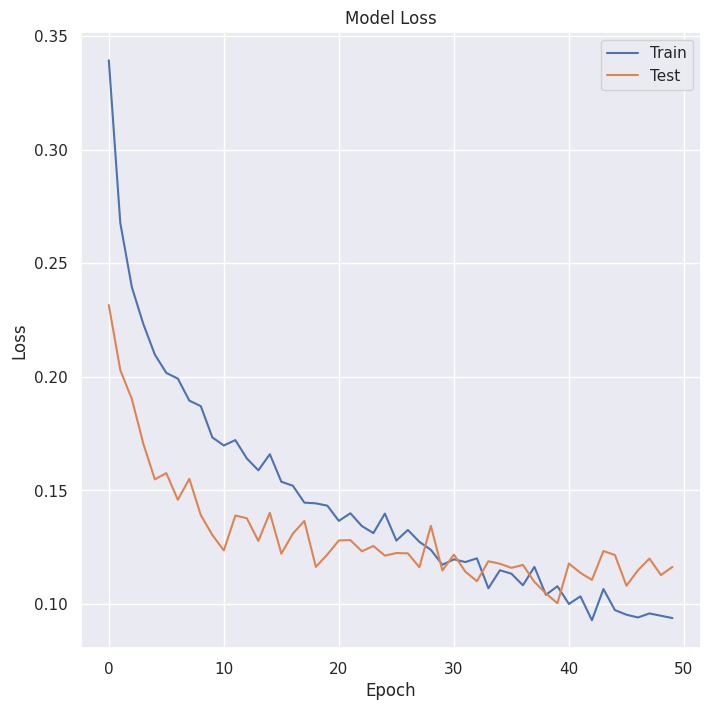

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()